In [27]:
#importação da base
import pandas as pd
train = pd.read_csv('train.csv')

import numpy as np

# verificando informções da base:
train.tail()# 5linhas



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
train.isnull().sum()# linhas com valores nulos


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:

train.describe(include='all')# informações como média, mediana, etc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sharp, Mr. Percival James R",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Text(5, 7.5, 'Matriz de correlação')

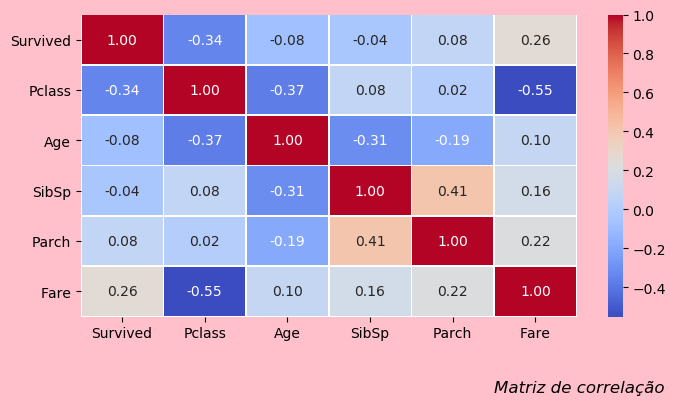

In [7]:

##########Matriz de correlação#############
import seaborn as sns
plt.figure(figsize=(8,4), dpi = 100, facecolor = 'Pink')
matriz_correl = sns.heatmap(train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].corr(), annot = True, fmt='.2f', cmap= 'coolwarm',linewidths=.5)
plt.text(5,7.5, "Matriz de correlação", fontsize = 12, color='Black', fontstyle='italic')

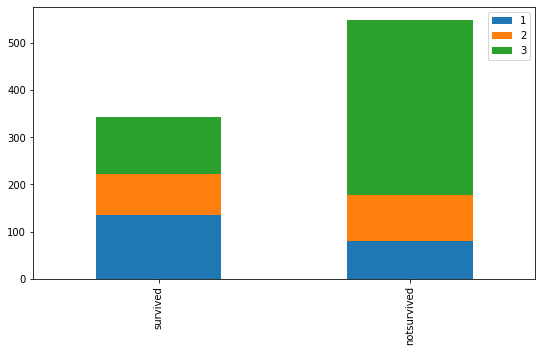

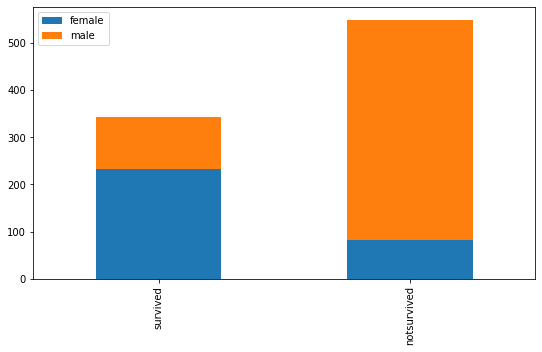

In [5]:
##########Graficos#############\
import matplotlib.pyplot as plt


#Barchart
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    notsurvived = train[train['Survived']==0][feature].value_counts()
    df =pd.DataFrame([survived,notsurvived])
    df.index = ['survived','notsurvived']
    df.plot(kind = 'bar', stacked = True, figsize =(9,5))

bar_chart('Pclass')# baseando na classe da cabine do passageiro
bar_chart('Sex') ## baseando no sexo do passageiro

    

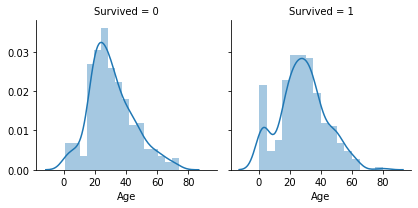

In [8]:
##########FacetGrid#############
graf_age = sns.FacetGrid(train, col='Survived')
graf_age = graf_age.map(sns.distplot,'Age')
#relação entre idade e sobrevivência dos indivíduos


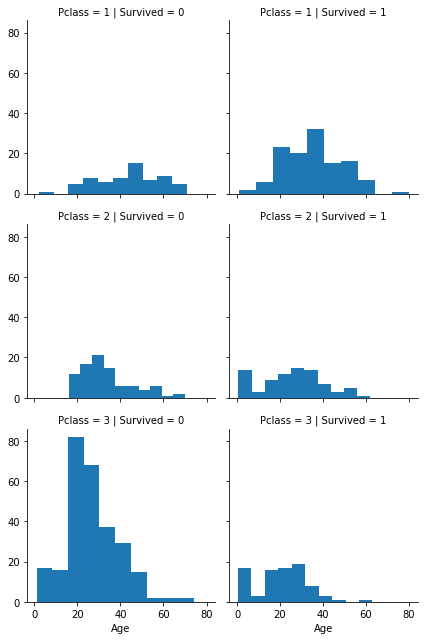

In [11]:
g = sns.FacetGrid(train, col='Survived',  row='Pclass')
g = g.map(plt.hist, 'Age')
#Relação entre sobreviventes ou não por classe


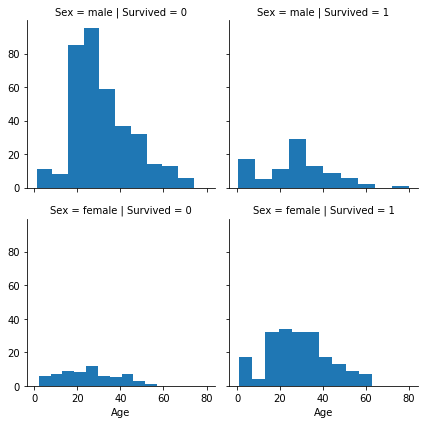

In [12]:

g = sns.FacetGrid(train, col='Survived',  row='Sex')
g = g.map(plt.hist, 'Age')
# relação entre sobreviventes ou não por sexo

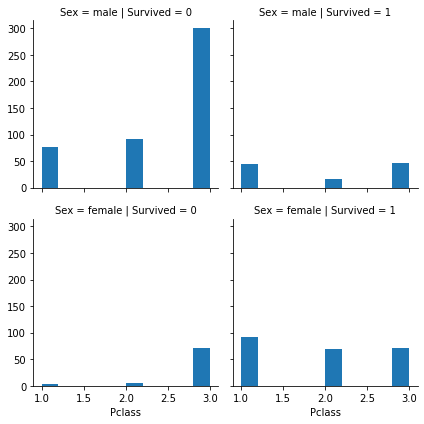

In [13]:
g = sns.FacetGrid(train, col='Survived',  row='Sex')
g = g.map(plt.hist, 'Pclass')
#relação entre sobreviventes ou não por sexo(entre classes distintas)


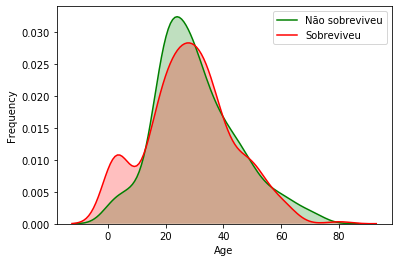

In [15]:
##########Kde plot#############

distribuicao = sns.kdeplot(train['Age'][(train['Survived']==0 & train['Age'].notnull())], color = 'green', shade = True)
distribuicao = sns.kdeplot(train['Age'][(train['Survived']==1 & train['Age'].notnull())], color = 'red', shade = True)
distribuicao.set_xlabel('Age')
distribuicao.set_ylabel('Frequency')
distribuicao = distribuicao.legend(['Não sobreviveu','Sobreviveu'])

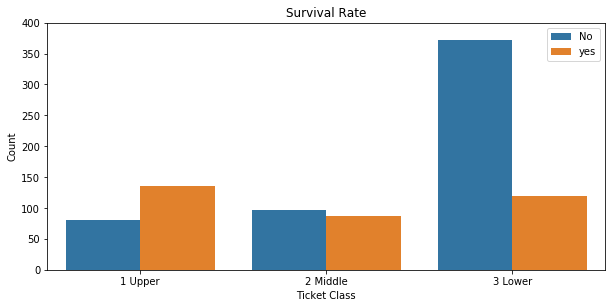

In [16]:
##########Kde plot#############

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'Pclass', hue = 'Survived', data = train)
ax1.set_title('Survival Rate')
ax1.set_xticklabels(['1 Upper','2 Middle','3 Lower'])
ax1.set_ylim(0,400)
ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('Count')
ax1.legend(['No','yes'])
#Relação entre sobreviventes e não sobreviventres por classe

Text(0.5, 1.0, 'Survival Percentage')

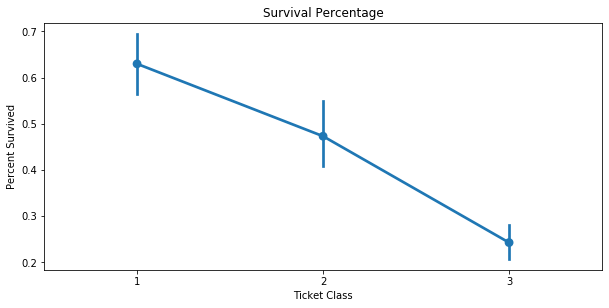

In [17]:
########Percent Survived####################
fig = plt.figure(figsize=(10,10))
ax2 = plt.subplot(2,1,2)
sns.pointplot(x='Pclass',y='Survived',data = train)
ax2.set_xlabel('Ticket Class')
ax2.set_ylabel('Percent Survived')
ax2.set_title('Survival Percentage')
#Percentagem de cobreviventes por classe.

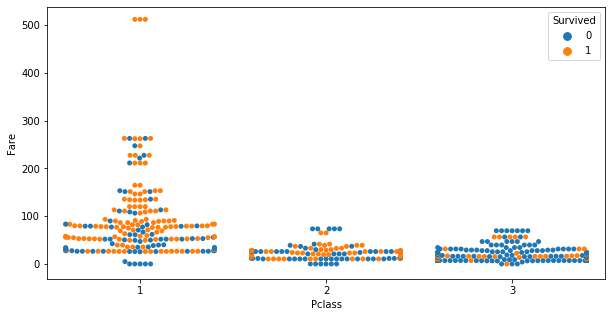

In [19]:
#############Survival rate vs Siblings or Spouse on Board################
fig = plt.figure(figsize=(10,5))
sns.swarmplot(x='Pclass',y='Fare',data=train,hue= 'Survived')

#Relação de classe X valor pago e os sobreviventes e não sobreviventes

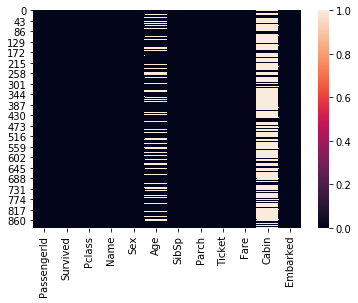

In [20]:
############Valores nulos#############
sns.heatmap(train.isnull())

In [28]:
#########################Tratamento dos dados#####################################
import warnings
warnings.filterwarnings('ignore')
#excluindo linhas de "Embarked" que possuam valores nulos
train = train.dropna(subset=['Embarked'])

#Transformação de variaveis categóricas para numéricas:

# EMBARKED

def embarked(s):
    if s =='S' :
        return 1
    elif s == 'C':
        return 2
    else:
        return 3

train['Embarked']=train['Embarked'].apply(embarked)
       
     
#SEX

gender = {'male': 0, 'female': 1}
for data in train:
    if data == 'Sex':
        train['Sex'] = train['Sex'].map(gender)
        
        
#exclui coluna B_Stance
del train['Name']
del train['PassengerId']
del train['Ticket']
del train['Cabin']

#localizando registros nulos e alterando pela média
#base.loc[pd.isnull(base['B_avg_BODY_att']),'B_avg_BODY_att'] = base['B_avg_BODY_att'][base.B_avg_BODY_att>0].mean()
colunas = []        
colunas = train.columns 
colunas = np.asarray(colunas)
for i in range(colunas.size):   
        if train[colunas[i]].isnull().sum() > 0:
           # print( colunas[i])
            train.loc[pd.isnull(train[colunas[i]]),colunas[i]] =  train[colunas[i]][train[colunas[i]]>0].mean()



# AGE
            
data = [train]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <=11,'Age'] =0
    dataset.loc[(dataset['Age'] >11) & (dataset['Age']<=20),'Age'] = 1
    dataset.loc[(dataset['Age'] >20) & (dataset['Age']<=25),'Age'] = 2
    dataset.loc[(dataset['Age'] >25) & (dataset['Age']<=30),'Age'] = 3
    dataset.loc[(dataset['Age'] >30) & (dataset['Age']<=38),'Age'] = 4
    dataset.loc[(dataset['Age'] >38) & (dataset['Age']<=50),'Age'] = 5
    dataset.loc[(dataset['Age'] >50) & (dataset['Age']<=62),'Age'] = 6
    dataset.loc[dataset['Age']>62,'Age'] = 7

train['Age'] = train['Age'].astype(int)

train['Age'].value_counts()


# FARE
    
from sklearn.preprocessing import LabelEncoder
train['Fare'] = pd.qcut(train['Fare'],5)
lbl = LabelEncoder()
train['Fare'] = lbl.fit_transform(train['Fare'])
    
train['Fare'] = train['Fare'].astype(int)

base = train

#criando nova coluna
base['Survived2'] = base['Survived']
del base['Survived']
base.rename(columns={'Survived2':'Survived'}, inplace = True)


In [29]:
#divisão da base em previsores e classe
previsores = base.iloc[:,0:7].values
classe = base.iloc[:,7].values

#escalonamento- deixar os valores em esclas parecidas -> melhor desempenho
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

#treinamento e teste
from sklearn.model_selection import train_test_split
previsores_treinamento,previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size = 0.15, random_state=0)

# importação da bibliotca
from sklearn.neighbors import KNeighborsClassifier
#criação doclassificador
classificador = KNeighborsClassifier(n_neighbors=5,metric='minkowski',  p=2)
classificador.fit(previsores_treinamento,classe_treinamento)
previsoes = classificador.predict(previsores_treinamento)


In [30]:
#Resulado
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_treinamento,previsoes)
matriz = confusion_matrix(classe_treinamento,previsoes)
print(precisao)
print(matriz)

0.8622516556291391
[[433  36]
 [ 68 218]]
